In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates = ['date'])

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
# Clean data
top_percentile = df.value.quantile(0.975)
bottom_percentile = df.value.quantile(0.025)
df = df[((df.value > bottom_percentile) & (df.value < top_percentile))]

In [5]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


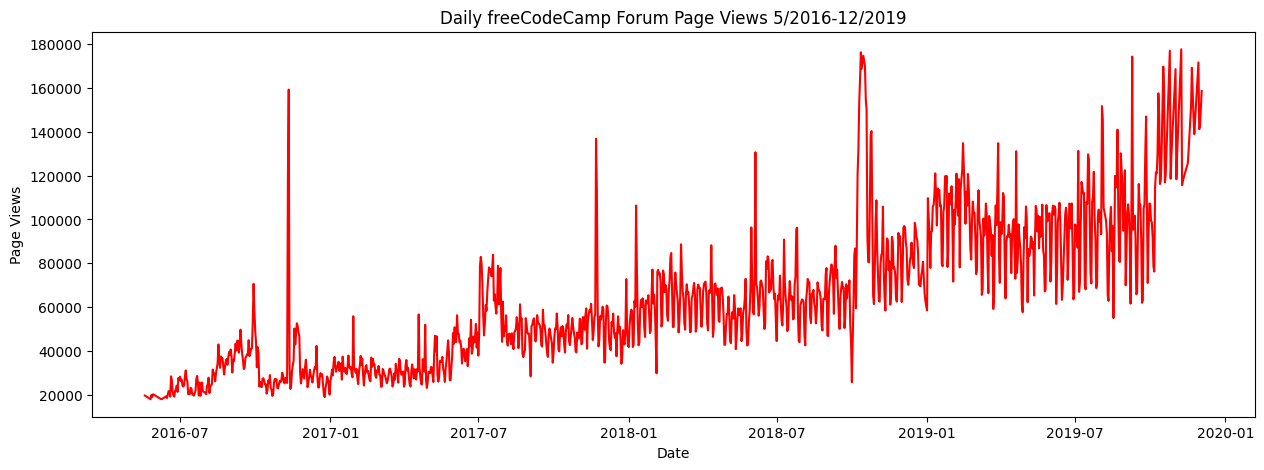

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df.value, color = "red")
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()

In [7]:
df.loc[:, 'Month'] = df.index.month
df.loc[:, 'Year'] = df.index.year

C:\Users\dhruv\AppData\Local\Temp\ipykernel_28872\3548322061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df.index.month
C:\Users\dhruv\AppData\Local\Temp\ipykernel_28872\3548322061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year'] = df.index.year


In [8]:
df

,value,Month,Year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [9]:
df_bar = df.groupby(['Month','Year']).value.mean()

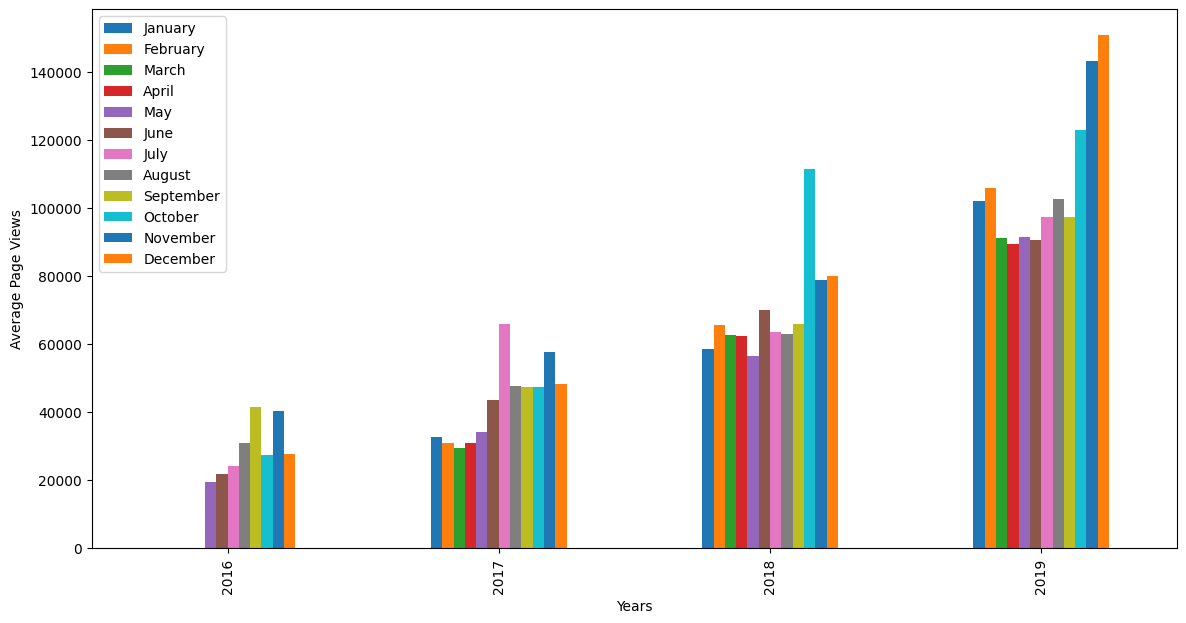

In [10]:
fig = df_bar.unstack(0).plot.bar(figsize=(14,7))
fig.set_xlabel('Years')
fig.set_ylabel('Average Page Views')
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.legend(fontsize = 10, labels = months)
plt.show()

In [11]:

plt.show()

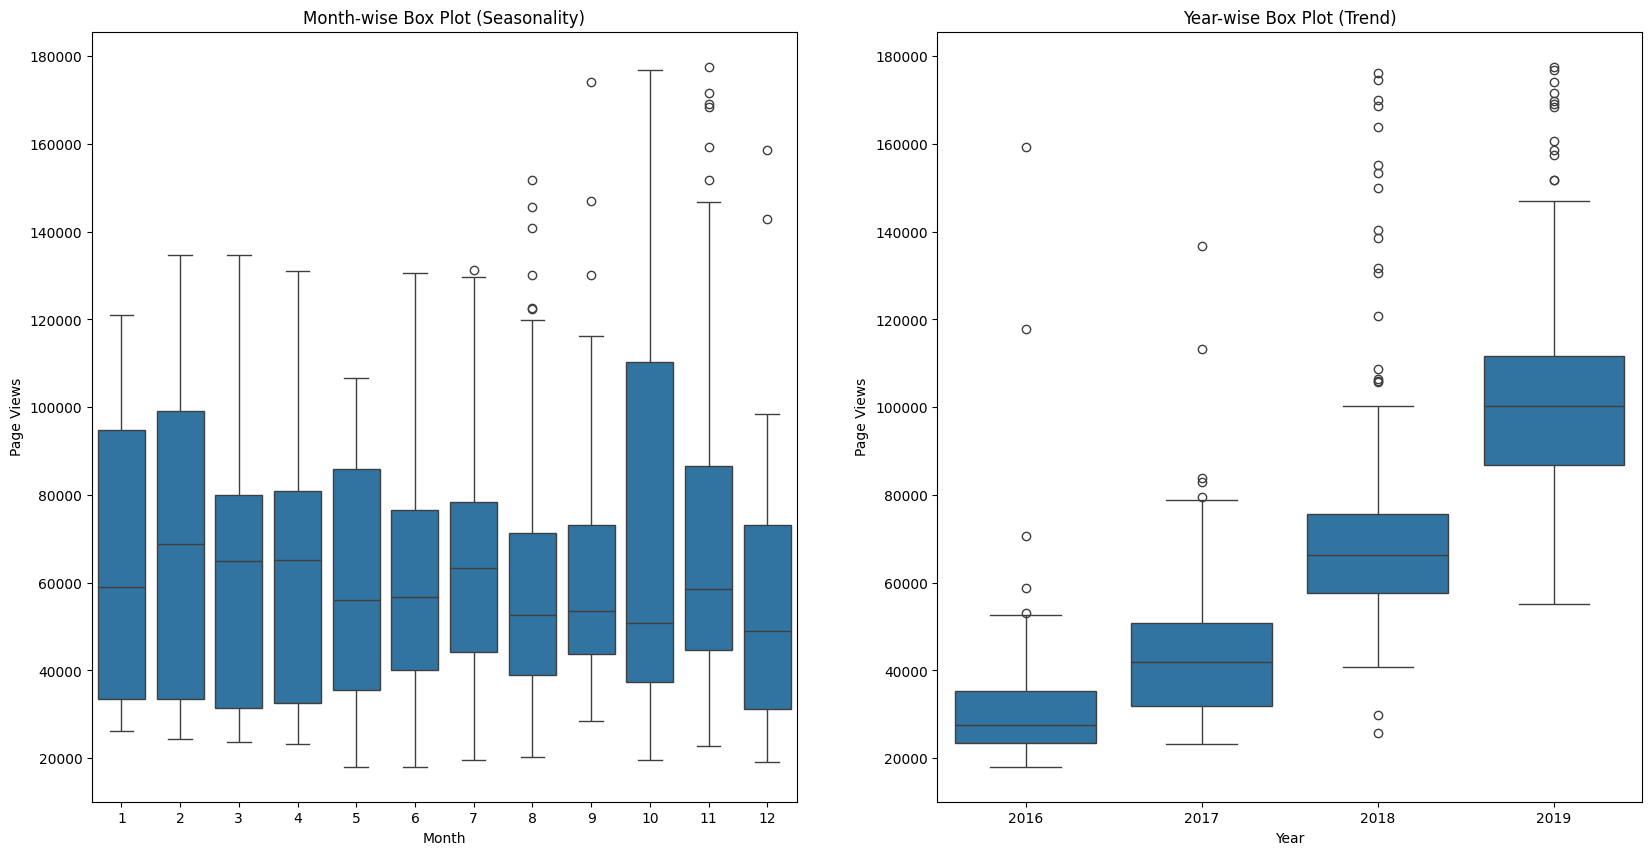

In [12]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x="Month", y="value", data=df, ax = axes[0])
ax1.set_xlabel('Month')
ax1.set_ylabel('Page Views')
ax1.set_title("Month-wise Box Plot (Seasonality)")

ax2 = sns.boxplot(x="Year", y="value", data=df, ax = axes[1])
ax2.set_xlabel('Year')
ax2.set_ylabel('Page Views')
ax2.set_title("Year-wise Box Plot (Trend)")

plt.show()